# Trabalho 02 Unidade 03

Link para o vídeo relacionado a esse notebook: https://youtu.be/x8JSSiqTO8M

## Componentes:
    
   - **Gleydvan Macedo**
   
   - **João Vítor Venceslau Coelho**
    
## Professor:

   - **Ivanovitch Medeiros Dantas Da Silva**
   
### Objetivo:
Realizar um estudo com diferentes configurações de redundância (TMR, 5MR, paralela com 2,3,4 dispositivos), valores de lambda. Identificar no estudo os valores temporais que a partir deles não se justifica o uso de redundância. Para cada cenário traçar linhas verticais indicando o MTTF de cada modelo de redundância.

### Referencias:
https://en.wikipedia.org/wiki/Hypoexponential_distribution

https://courses.engr.illinois.edu/ece313/fa2013/SectionB/Lectures/lec_21.pdf

https://courses.engr.illinois.edu/ece313/fa1999MW/Lectures/lec28.pdf

https://src.alionscience.com/pdf/S&PSYSREL.pdf

http://www.weibull.com/hotwire/issue94/relbasics94.htm

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
from scipy import linspace
import seaborn as sns
sns.set()
sns.set_context("notebook")

In [2]:
def hypoexp( t, lambda1, lambda2 ):
    return ((lambda2/(lambda2-lambda1))*(math.e**(-(lambda1*t))))-((lambda1/(lambda2-lambda1))*(math.e**(-(lambda2*t))))

def hypoFail( t, lambda1, lambda2 ):
    return ((lambda1*lambda2)*((math.e**(-lambda1*t))-(math.e**(-lambda2*t))))/((lambda2*(math.e**(-lambda1*t)))-(lambda1*(math.e**(-lambda2*t))))

In [3]:
def hypo2fasesPDF ( t, lambda1, lambda2 ):
    return ((lambda1*lambda2)/(lambda2-lambda1))*(math.e**(-lambda1*t)-(math.e**(-lambda2*t)))

def hypo2fasesCDF ( t, lambda1, lambda2 ):
    return 1-((lambda2/(lambda2-lambda1))*(math.e**(-(lambda1*t))))+((lambda1/(lambda2-lambda1))*(math.e**(-(lambda2*t))))

In [4]:
def confiabilidade(lambda_, tempo):
    return math.e**(-lambda_*tempo)

def TMR( R, q ):
    return np.sum([scipy.special.comb(q,i)*(R**i)*((1-R)**(q-i)) for i in range(2,q+1)])

def MTTF( list_lambdas ):
    return np.sum([1/i for i in list_lambdas])

In [5]:
def plot_cool_lines( ax, lambda_ , tamanho_grafico, MTTF_or_MEAN = ''):
    Time = linspace(0,tamanho_grafico,tamanho_grafico+1)/100.0
    
    Sem_Redundancia = [confiabilidade( lambda_, t) for t in Time]
    
    Redundancia_TMR = [TMR(r,3) for r in Sem_Redundancia]
    Redundancia_TMR = [TMR(r,3) for r in Sem_Redundancia]
    Redundancia_5MR = [TMR(r,5) for r in Sem_Redundancia]
        
    Redundancia_Paralela_2 = [1 - ((1-r)**2) for r in Sem_Redundancia]
    Redundancia_Paralela_3 = [1 - ((1-r)**3) for r in Sem_Redundancia]
    Redundancia_Paralela_4 = [1 - ((1-r)**4) for r in Sem_Redundancia]
    
    ax.plot(Time,Sem_Redundancia,label='Sem_Redundancia', color='k')
    ax.plot(Time,Redundancia_TMR,label='Redundancia_TMR', color='c')
    ax.plot(Time,Redundancia_5MR,label='Redundancia_5MR', color='y')
    
    ax.plot(Time,Redundancia_Paralela_2,label='Redundancia_Paralela_2', color='r')
    ax.plot(Time,Redundancia_Paralela_3,label='Redundancia_Paralela_3', color='g')
    ax.plot(Time,Redundancia_Paralela_4,label='Redundancia_Paralela_4', color='b')

    if (MTTF_or_MEAN == 'MTTF'):
# Linhas que representam o MTTF de cada uma das 6 curvas
        ax.axvline(MTTF([lambda_]), color='k', linestyle='--',label='MTTF - Sem_Redundancia')
        ax.axvline(MTTF([3*lambda_,2*lambda_]), color='c', linestyle='--',label='MTTF - Redundancia_TMR')
        ax.axvline(MTTF([5*lambda_,4*lambda_,3*lambda_,2*lambda_]), color='y', linestyle='--',label='MTTF - Redundancia_5MR')

        ax.axvline(2*MTTF([lambda_]) - MTTF([2*lambda_]), color='r', linestyle='--',label='MTTF - Redundancia_Paralela_2')
        ax.axvline(3*MTTF([lambda_]) - MTTF([3*lambda_]), color='g', linestyle='--',label='MTTF - Redundancia_Paralela_3')
        ax.axvline(4*MTTF([lambda_]) - MTTF([4*lambda_]), color='b', linestyle='--',label='MTTF - Redundancia_Paralela_4')
    elif (MTTF_or_MEAN == 'MEAN'):
# Linhas que representam a média dos valores em cada uma das das 6 curvas    
        ax.axvline(np.mean(Sem_Redundancia), color='k', linestyle='--',label='Média - Sem_Redundancia')
        ax.axvline(np.mean(Redundancia_TMR), color='c', linestyle='--',label='Média - Redundancia_TMR')
        ax.axvline(np.mean(Redundancia_5MR), color='y', linestyle='--',label='Média - Redundancia_5MR')

        ax.axvline(np.mean(Redundancia_Paralela_2), color='r', linestyle='--',label='Média - Redundancia_Paralela_2')
        ax.axvline(np.mean(Redundancia_Paralela_3), color='g', linestyle='--',label='Média - Redundancia_Paralela_3')
        ax.axvline(np.mean(Redundancia_Paralela_4), color='b', linestyle='--',label='Média - Redundancia_Paralela_4')
    
    ax.set_xlabel('Time(t)', size=15)
    ax.set_ylabel('Reliability(t)', size=15)
    ax.set_title('lambda = ' + str(lambda_), size=15)
    ax.legend(loc='best')
    return ax

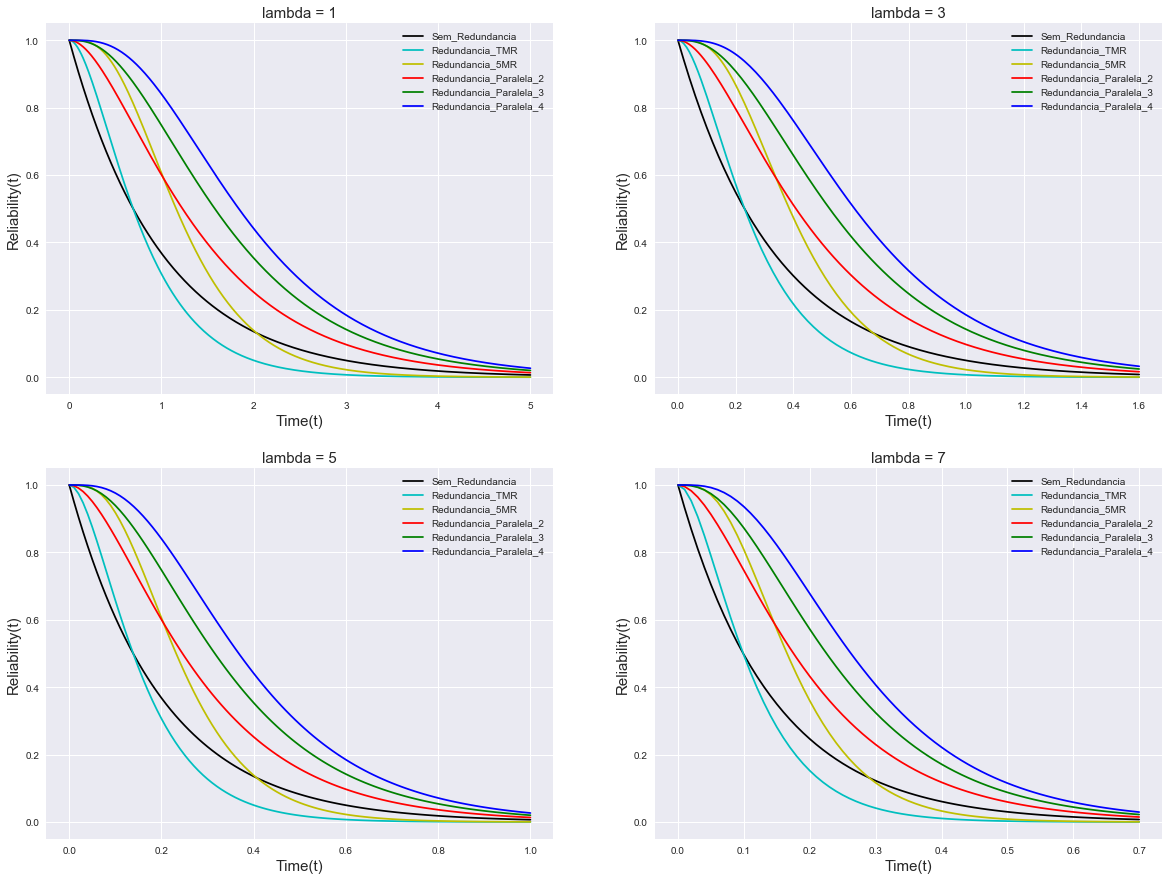

In [6]:
plt.close()

fig = plt.figure(figsize=(20,15))
lambda_1 = fig.add_subplot(2,2,1)
lambda_1 = plot_cool_lines(lambda_1, 1,500 )

lambda_3 = fig.add_subplot(2,2,2)
lambda_3 = plot_cool_lines(lambda_3, 3,160 )

lambda_5 = fig.add_subplot(2,2,3)
lambda_5 = plot_cool_lines(lambda_5, 5,100 )

lambda_7 = fig.add_subplot(2,2,4)
lambda_7 = plot_cool_lines(lambda_7, 7,70  )

plt.show()

#### Analise com base nos Gráficos gerados de cada sistema analisado:

Com base nas analises dos gráficos vemos nitidamente que o uso da Redundância Paralela com 4 Dispositivos possui maior Confiabilidade em comparação aos outros sistemas, porém não temos como afirmar com certeza qual sistema possui um melhor custo benefício já que não temos dados sobre os custos dos mesmos.
O sistema Sem Redundância a um curto prazo seria o pior a ser utilizado, porém com o passar do tempo o sistema com Redundância TMR passa a ter uma Confiabilidade menor do que o sistema Sem Redundância.
O sistema com Redundância 5MR por sua vez começa com uma boa taxa de confiabilidade em relação ao tempo, mas como podemos ver ele tem uma taxa de alta de decaimento da Confiabilidade e em um curto periodo de tempo passa a ser menos confiável do que o sistema Sem Redundância, mas ainda assim mais confiável do que o sistema TMR.
No que diz respeito aos sistemas com Redundância Paralela com 2 Dispositivos e ao sistema com Redundância Paralela com 3 Dispositivos ambos tem uma boa taxa de Confiabilidade, porém ainda abaixo do sistema Redundância Paralela com 4 Dispositivos.

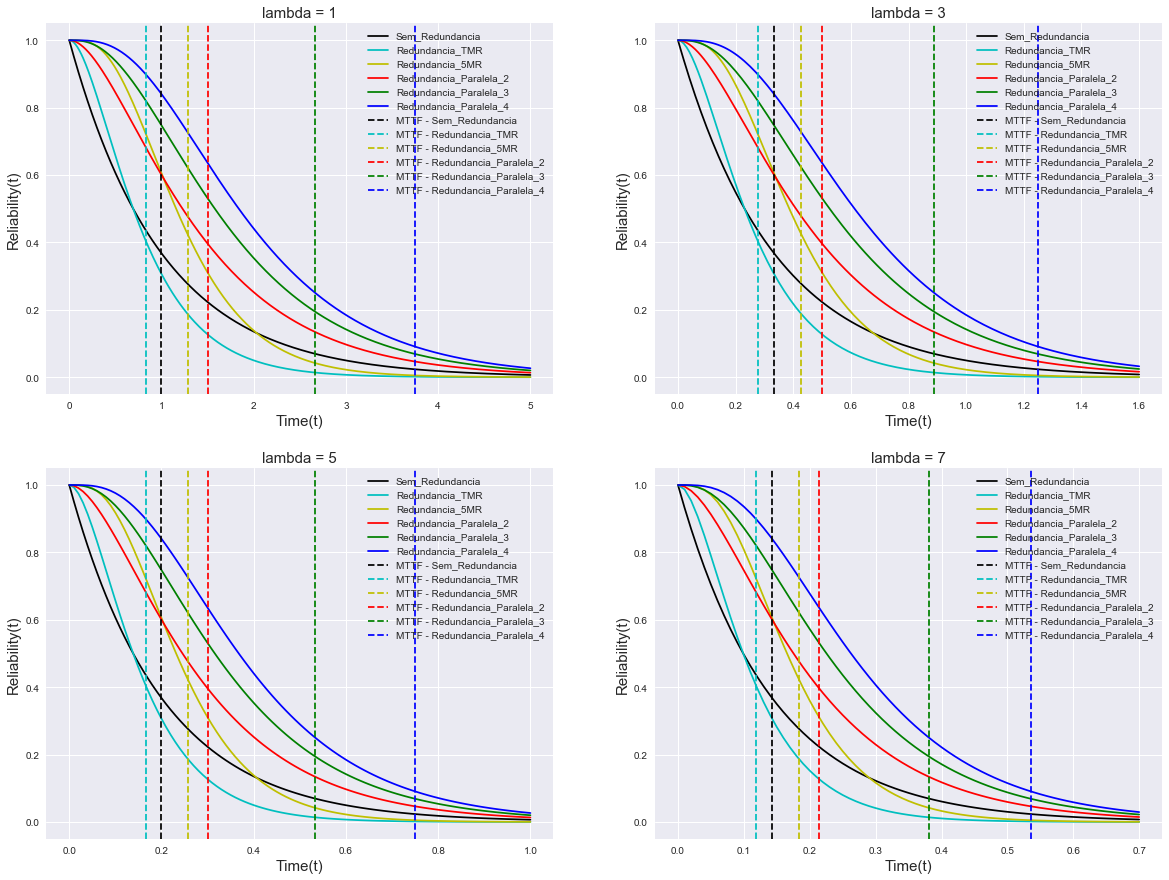

In [7]:
plt.close()

fig = plt.figure(figsize=(20,15))
lambda_1 = fig.add_subplot(2,2,1)
lambda_1 = plot_cool_lines(lambda_1, 1,500 ,"MTTF")

lambda_3 = fig.add_subplot(2,2,2)
lambda_3 = plot_cool_lines(lambda_3, 3,160 ,"MTTF")

lambda_5 = fig.add_subplot(2,2,3)
lambda_5 = plot_cool_lines(lambda_5, 5,100 ,"MTTF")

lambda_7 = fig.add_subplot(2,2,4)
lambda_7 = plot_cool_lines(lambda_7, 7,70  ,"MTTF")

plt.show()

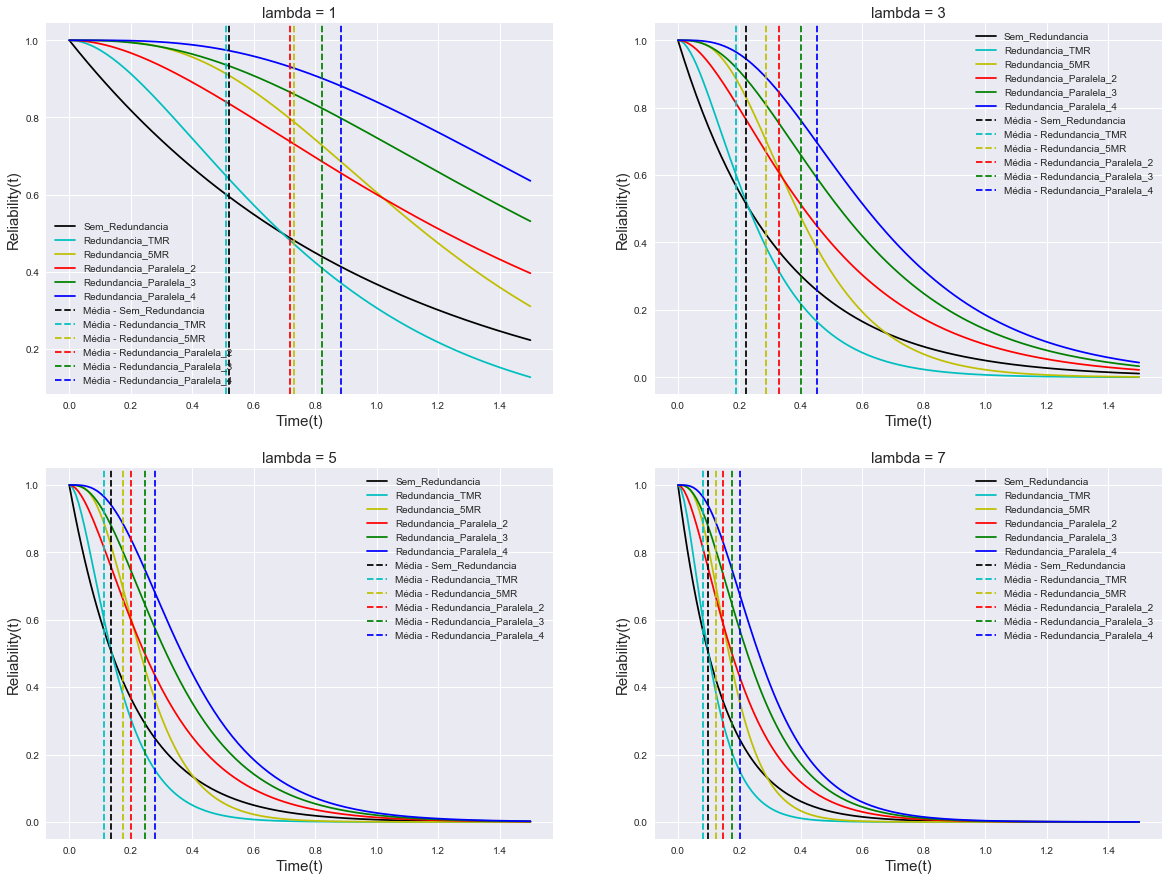

In [9]:
plt.close()

fig = plt.figure(figsize=(20,15))
lambda_1 = fig.add_subplot(2,2,1)
lambda_1 = plot_cool_lines(lambda_1, 1,150 ,"MEAN")

lambda_3 = fig.add_subplot(2,2,2)
lambda_3 = plot_cool_lines(lambda_3, 3,150 ,"MEAN")

lambda_5 = fig.add_subplot(2,2,3)
lambda_5 = plot_cool_lines(lambda_5, 5,150 ,"MEAN")

lambda_7 = fig.add_subplot(2,2,4)
lambda_7 = plot_cool_lines(lambda_7, 7,150  ,"MEAN")

plt.show()

#### Analise com base nos MTTF de cada sistema analisado:

O sistema de Redundância Paralela com 4 Dispositivos possui o melhor MTTF (Tempo Médio para Falha) dentre os sistemas, ou seja com base nisso seria o melhor sistema para uso, porém como dito anteriormente na analise de gráfcos não temos como afimar com certeza se seria o melhor custo benefício.

O sistema de Redundância TMR possui o pior MTTF, sendo assim seria a pior escolha possivel para a utilização.

O sistema Sem Redundância também possui um MTTF ruim, ficando com o posto de segundo pior sistema a ser utilizado.

O sistema de Redundância Paralela com 3 Dispositivos possui o segundo melhor MTTF, ficando pouca coisa atrás do Redundância Paralela com 4 Dispositivos.

Os demais sistemas possuem um MTTF "mediano".

Conclui-se que dentre os sistemas análisados a melhor escolha seria o sistema de Redundância Paralela com 4 Dispositivos, mas infelizmente só a análise de Confiabilidade não é suficiente para escolher o sistema a ser utilizado também deve-se realizar uma análise de custo de ambos os sistemas.